In [29]:
import pandas as pd
import numpy as np 

import boto3
import sagemaker.amazon.common as smac

In [30]:
# Download Data from S3 -- Simplest method

s3 = boto3.resource('s3')
bucket = s3.Bucket('sagemakerpractise') #Bucket
obj = bucket.Object('Random_Forest/Position_Salaries.csv') #File in the bucket or File path 

with open('PositionSal', 'wb') as data:
    obj.download_fileobj(data)

In [31]:
sal_data = pd.read_csv('PositionSal')

In [32]:
sal_data = pd.DataFrame(sal_data)

In [33]:
sal_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [34]:
# Alternative method 

In [35]:
# Function to download data from S3

def download_from_s3(filename, bucket, key):
    with open(filename, 'wb') as f: #Write in Binary Mode
        return boto3.resource('s3').Bucket(bucket).Object(key).download_fileobj(f)

In [36]:
download_from_s3('Salary', 'sagemakerpractise', 'Random_Forest/Position_Salaries.csv')

In [37]:
PosiSalary = pd.read_csv('Salary')

In [38]:
import matplotlib.pyplot as plt

In [39]:
PosiSalary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [40]:
#Random Forest Regression

In [41]:
PosiSalary = pd.read_csv('Salary')
# -1 indicates that the everything except last column is selected. In this dataset dependent variable is in the last column
# therefore -1 means you end up selecting all the independent varibles 
X = PosiSalary.iloc[:, 1:2].values # X should always be a matrix 
# Dependent varibale in this instance is placed in the column 1 (count in python starting at 0)
Y = PosiSalary.iloc[:, 2].values # Y should always be a vector

In [42]:
# Create Training set and test set

In [43]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [44]:
# Feature Scaling

In [45]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_Y = StandardScaler()

In [46]:
#X = sc_X.fit_transform(X)
#Y = np.array(Y).reshape(-1, 1)
#Y = sc_Y.fit_transform(Y)

In [47]:
#Fitting Random Forest Regression to training set

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [63]:
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
Y_pred = regressor.predict(6.5)

In [65]:
Y_pred

array([160333.33333333])

In [60]:
# Visualise the Random Forest regression model.

Text(0,0.5,'Salary')

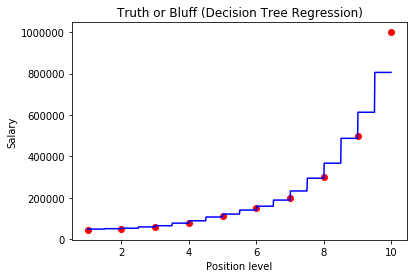

In [61]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [ ]:
# So finally with Random Forest Regression model the predicted Salary for 6.5 scale of experience is 170,370, which is very close to what the candidate has claimed.